<a href="https://colab.research.google.com/github/gulshan0201/DATA-Science/blob/main/ML_lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

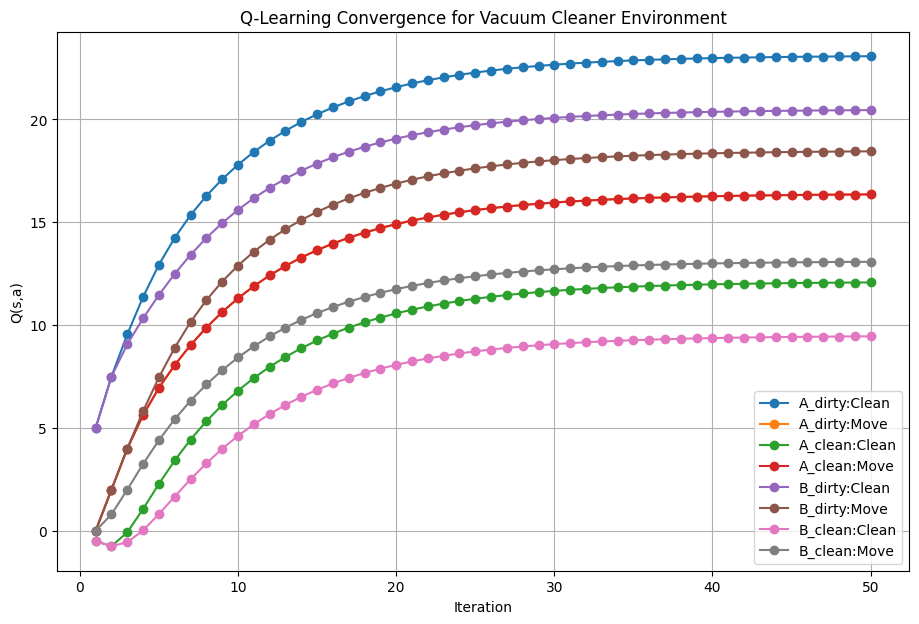

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

alpha = 0.5   # learning rate
gamma = 0.8   # discount factor

states = ["A_dirty", "A_clean", "B_dirty", "B_clean"]
actions = ["Clean", "Move"]

# Environment transition sequence
sequence = [
    ("A_dirty", "Move", "B_dirty"),
    ("B_dirty", "Move", "A_dirty"),
    ("A_dirty", "Clean", "A_clean"),
    ("A_clean", "Clean", "A_clean"),
    ("A_clean", "Move", "B_dirty"),
    ("B_dirty", "Clean", "B_clean"),
    ("B_clean", "Clean", "B_clean"),
    ("B_clean", "Move", "A_clean"),
]

def reward(state, action):
    if action == "Clean":
        return 10 if "dirty" in state else -1
    return 0

# Initialize Q-table
Q = {s: {a: 0.0 for a in actions} for s in states}

def max_Q(s):
    return max(Q[s].values())

iters = list(range(1, 51))
traj_Q = {f"{s}:{a}": [] for s in states for a in actions}

# Run for 50 iterations
for it in iters:
    for (s, a, s_next) in sequence:
        r = reward(s, a)
        target = r + gamma * max_Q(s_next)
        Q[s][a] += alpha * (target - Q[s][a])
    for s in states:
        for a in actions:
            traj_Q[f"{s}:{a}"].append(Q[s][a])

# Convert to DataFrame for inspection
df = pd.DataFrame({"iteration": iters, **traj_Q})
df.to_csv("vacuum_Q_values.csv", index=False)

# Plot all Q(s,a) curves
plt.figure(figsize=(11,7))
for key in traj_Q.keys():
    plt.plot(iters, traj_Q[key], label=key, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Q(s,a)")
plt.title("Q-Learning Convergence for Vacuum Cleaner Environment")
plt.legend()
plt.grid(True)
plt.show()


# Task 1

Final Q-Table Values:
             Clean       Move
A_dirty  23.076723  16.356945
A_clean  12.076723  16.356945
B_dirty  20.456777  18.452175
B_clean   9.456777  13.081140


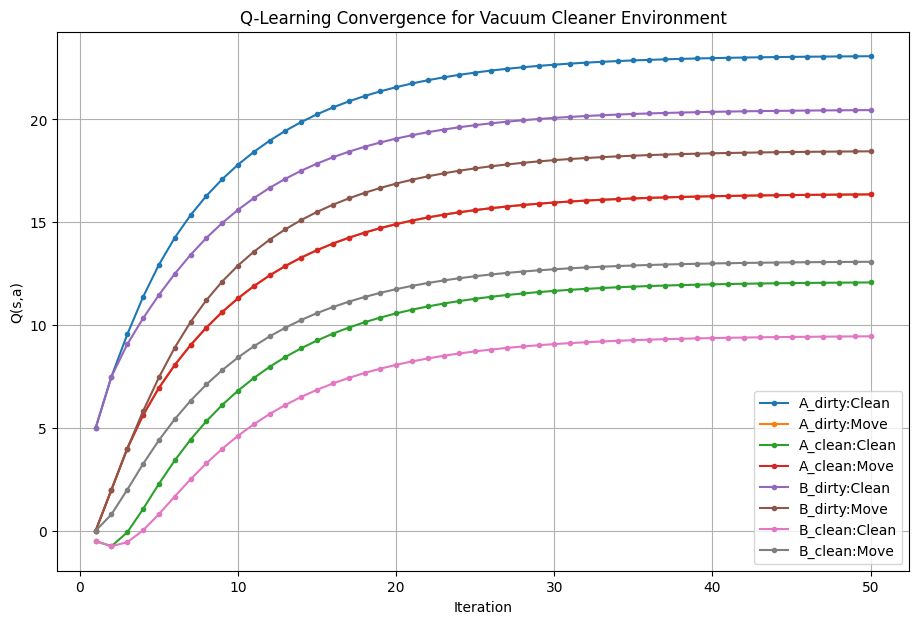

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Configuration ---
alpha = 0.5   # learning rate
gamma = 0.8   # discount factor
states = ["A_dirty", "A_clean", "B_dirty", "B_clean"]
actions = ["Clean", "Move"]

# --- Environment Transition Sequence ---
sequence = [
    ("A_dirty", "Move", "B_dirty"),
    ("B_dirty", "Move", "A_dirty"),
    ("A_dirty", "Clean", "A_clean"),
    ("A_clean", "Clean", "A_clean"),
    ("A_clean", "Move", "B_dirty"),
    ("B_dirty", "Clean", "B_clean"),
    ("B_clean", "Clean", "B_clean"),
    ("B_clean", "Move", "A_clean"),
]

# --- Helper Functions ---
def reward(state, action):
    if action == "Clean":
        return 10 if "dirty" in state else -1
    return 0

# Initialize Q-table
Q = {s: {a: 0.0 for a in actions} for s in states}

def max_Q(s):
    return max(Q[s].values())

# --- Training Loop ---
iters = list(range(1, 51))
traj_Q = {f"{s}:{a}": [] for s in states for a in actions}

# Run for 50 iterations
for it in iters:
    for (s, a, s_next) in sequence:
        r = reward(s, a)
        target = r + gamma * max_Q(s_next)
        Q[s][a] += alpha * (target - Q[s][a])

    # Record Q-values for plotting
    for s in states:
        for a in actions:
            traj_Q[f"{s}:{a}"].append(Q[s][a])

# --- Output Results ---
# 1. Print Final Q-Table
print("Final Q-Table Values:")
df_final = pd.DataFrame(Q).T
print(df_final)

# 2. Save to CSV
df_history = pd.DataFrame({"iteration": iters, **traj_Q})
df_history.to_csv("vacuum_Q_values.csv", index=False)

# 3. Plot Convergence Graph
plt.figure(figsize=(11,7))
for key in traj_Q.keys():
    plt.plot(iters, traj_Q[key], label=key, marker='o', markersize=3)

plt.xlabel("Iteration")
plt.ylabel("Q(s,a)")
plt.title("Q-Learning Convergence for Vacuum Cleaner Environment")
plt.legend()
plt.grid(True)
plt.show()